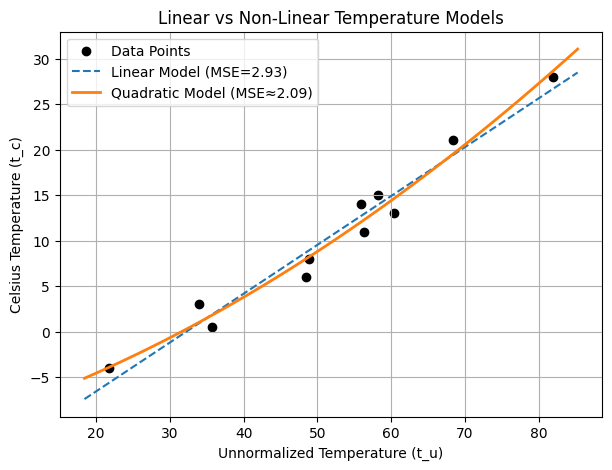

Final Linear Model Loss (MSE): 2.927645
Best Nonlinear Model Loss (MSE): 2.090719


In [1]:
# Mohammadmilad Sayyad____801419978

# Problem 1.c — Compare best non-linear vs. linear model (visualization)

import torch
import matplotlib.pyplot as plt

# ---- data ----
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]).float()
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]).float()

# normalize input
tu_mean, tu_std = t_u.mean(), t_u.std()
t_u_n = (t_u - tu_mean) / tu_std

# ---- best non-linear model (from 1.b, lr=0.01) ----
w2_best = torch.tensor(0.802)
w1_best = torch.tensor(9.103)
b_best  = torch.tensor(9.771)

def model_quadratic(tu_n):
    return w2_best * (tu_n ** 2) + w1_best * tu_n + b_best

# ---- baseline linear model (as in lecture) ----
# Fit again quickly (SGD on linear model)
w_lin = torch.zeros(1, requires_grad=True)
b_lin = torch.zeros(1, requires_grad=True)
loss_fn = torch.nn.MSELoss()
opt_lin = torch.optim.SGD([w_lin, b_lin], lr=1e-2)

for epoch in range(5000):
    t_p = w_lin * t_u_n + b_lin
    loss = loss_fn(t_p, t_c)
    opt_lin.zero_grad()
    loss.backward()
    opt_lin.step()
loss_linear_final = loss.item()

# ---- compare predictions ----
t_range = torch.linspace(t_u_n.min()-0.2, t_u_n.max()+0.2, 100)
t_c_quad = model_quadratic(t_range)
t_c_lin  = w_lin.detach() * t_range + b_lin.detach()

# inverse normalization for plotting
t_range_unnorm = t_range * tu_std + tu_mean

plt.figure(figsize=(7,5))
plt.scatter(t_u, t_c, label='Data Points', color='black')
plt.plot(t_range_unnorm, t_c_lin, label=f'Linear Model (MSE={loss_linear_final:.2f})', linestyle='--')
plt.plot(t_range_unnorm, t_c_quad, label='Quadratic Model (MSE≈2.09)', linewidth=2)
plt.xlabel('Unnormalized Temperature (t_u)')
plt.ylabel('Celsius Temperature (t_c)')
plt.title('Linear vs Non-Linear Temperature Models')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Linear Model Loss (MSE): {loss_linear_final:.6f}")
print("Best Nonlinear Model Loss (MSE): 2.090719")
